In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('whitegrid')
sns.set_context('talk')

https://www.kaggle.com/datasets/harshalhonde/tsunami-events-dataset-1900-present/

In [4]:
data = pd.read_csv('./data/tsunamis-2023-09-11_22-13-51_ 0530 (2).csv')
data

,Sr.no,Year,Mo,Dy,Hr,Mn,Sec,TsunamiNanEventNanValidity,TsunamiNanCauseNanCode,EarthquakeNanMagnitude,...,TotalNanMissing,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription
0,1,1900,1.0,10.0,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1900,8.0,11.0,4.0,40.0,NaN,4,3,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,1900,9.0,10.0,21.0,30.0,NaN,4,1,6.8,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,4,1900,9.0,17.0,21.0,45.0,NaN,3,1,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1900,10.0,7.0,21.0,4.0,NaN,3,1,6.9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1439,2023,4.0,24.0,20.0,0.0,57.0,4,1,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,1440,2023,5.0,5.0,5.0,42.0,4.0,4,1,6.2,...,NaN,NaN,34.0,1.0,NaN,2.0,3.0,1.0,351.0,3.0
1440,1441,2023,5.0,19.0,2.0,57.0,6.0,4,1,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441,1442,2023,5.0,20.0,1.0,51.0,1.0,4,1,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns = [cc.replace('Nan', ' ') for cc in data.columns.values]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sr.no                               1443 non-null   int64  
 1   Year                                1443 non-null   int64  
 2   Mo                                  1431 non-null   float64
 3   Dy                                  1409 non-null   float64
 4   Hr                                  1132 non-null   float64
 5   Mn                                  1119 non-null   float64
 6   Sec                                 964 non-null    float64
 7   Tsunami Event Validity              1443 non-null   int64  
 8   Tsunami Cause Code                  1443 non-null   int64  
 9   Earthquake Magnitude                1057 non-null   float64
 10  Vol                                 92 non-null     float64
 11  More Info                           0 non-n

How many tsunamis occurred per year?

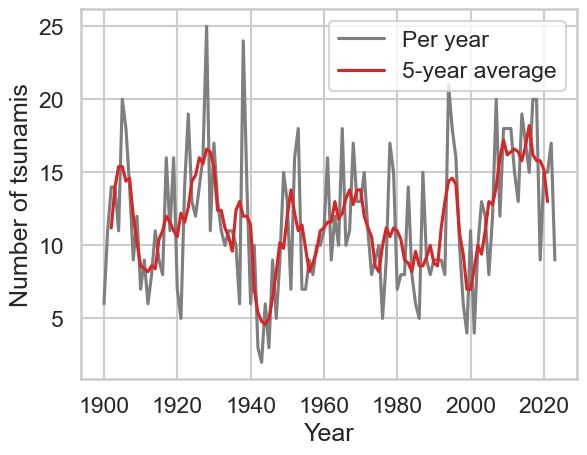

In [7]:
fig, ax = plt.subplots(1, 1)

tmp = data['Year'].value_counts().to_frame().reset_index().sort_values('Year')

sns.lineplot(data=tmp, x='Year', y='count', color='C7', label='Per year')

sns.lineplot(data=tmp.rolling(5).mean(), x='Year', y='count', color='C3', label='5-year average')

ax.set_ylabel('Number of tsunamis')
ax.legend()

plt.savefig('./plots/2024-01-12_count.png', dpi=150, bbox_inches='tight')

How are tsunamis distributed over months?

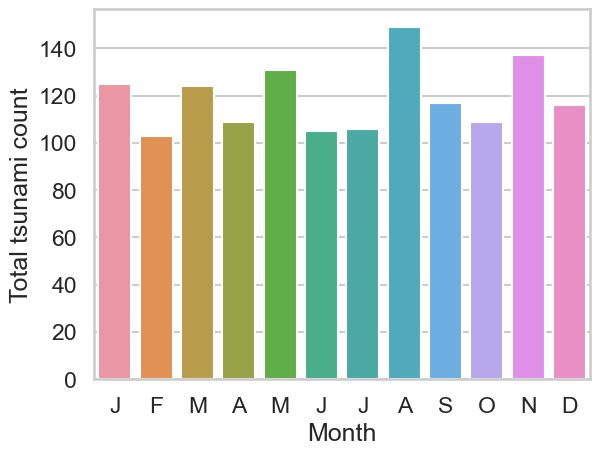

In [8]:
tmp = data['Mo'].value_counts().to_frame().reset_index().sort_values('Mo')

fig, ax = plt.subplots(1, 1)

sns.barplot(data=tmp, x='Mo', y='count')
ax.set_xticks(list(range(12)))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

ax.set_xlabel('Month')
ax.set_ylabel('Total tsunami count')

plt.savefig('./plots/2024-01-12_months.png', dpi=150, bbox_inches='tight')

What causes tsunamis?

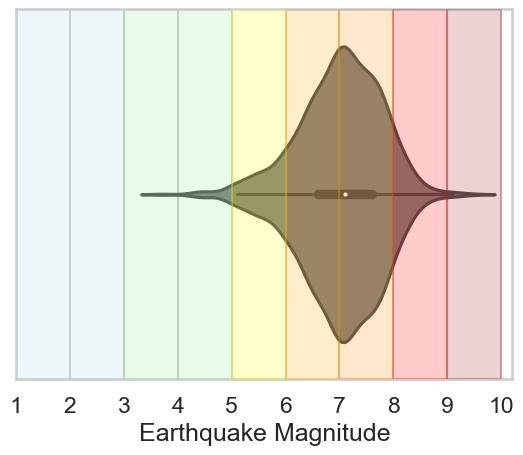

In [9]:
fig, ax = plt.subplots(1, 1)

sns.violinplot(data=data, x='Earthquake Magnitude', zorder=11, color='C7')

ax.set_xticks(list(range(1, 11)))

ax.add_patch(Rectangle((1, -0.5), 2, 1, alpha=0.2, zorder=10, color='lightblue'))
ax.add_patch(Rectangle((3, -0.5), 2, 1, alpha=0.2, zorder=10, color='lightgreen'))
ax.add_patch(Rectangle((5, -0.5), 1, 1, alpha=0.2, zorder=10, color='yellow'))
ax.add_patch(Rectangle((6, -0.5), 1, 1, alpha=0.2, zorder=10, color='orange'))
ax.add_patch(Rectangle((7, -0.5), 1, 1, alpha=0.2, zorder=10, color='darkorange'))
ax.add_patch(Rectangle((8, -0.5), 1, 1, alpha=0.2, zorder=10, color='red'))
ax.add_patch(Rectangle((9, -0.5), 1, 1, alpha=0.2, zorder=10, color='brown'))

plt.savefig('./plots/2024-01-12_eqmag.png', dpi=150, bbox_inches='tight')

Which countries are affected most by tsunamis?

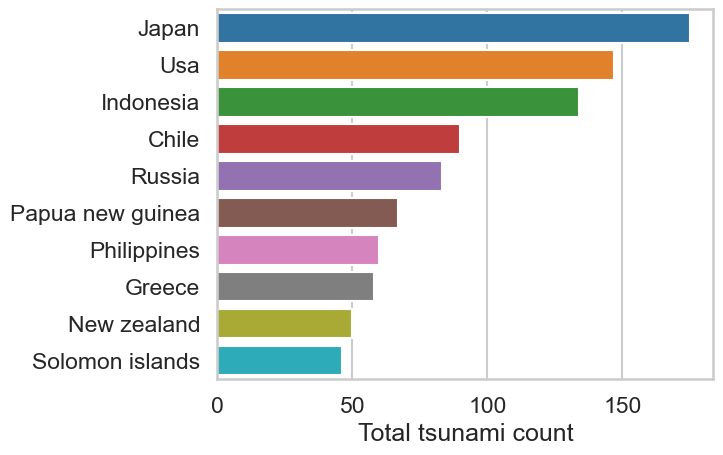

In [10]:
tmp = data['Country'].value_counts().to_frame().reset_index()

tmp['Country'] = tmp['Country'].apply(lambda x: x.replace('Nan', ' ').lower().capitalize())

fig, ax = plt.subplots(1, 1)

sns.barplot(data=tmp.iloc[:10, :], x='count', y='Country')

ax.set_xlabel('Total tsunami count')
ax.set_ylabel('')

plt.savefig('./plots/2024-01-12_country.png', dpi=150, bbox_inches='tight')